# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM{ ( xi - x_mean) * (yi - y_mean) } / SUM{ (xi - x_mean)^2 }``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [2]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#load and inspect the data
df = 0
### BEGIN SOLUTION
df = pd.read_csv("./reg_data.csv")
### END SOLUTION


In [4]:
assert df.shape == (100,2)

<AxesSubplot:xlabel='X', ylabel='Y'>

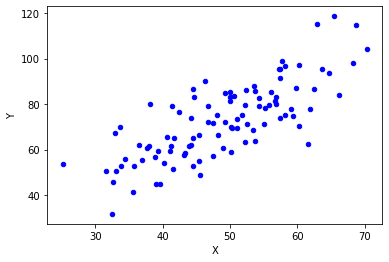

In [5]:
#plot the data (scatter)
### BEGIN SOLUTION
df.plot.scatter(x='X',y='Y',c='Blue')
### END SOLUTION

In [41]:
#make the train test split tested with seed 0 and a test_size = 0.2

# YOUR CODE HERE
x=df['X']
y=df['Y']
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8 ,random_state = 0)
# raise NotImplementedError()

In [42]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [43]:
#implement a least squares function to find a, b

x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0

### BEGIN SOLUTION
x_mean = x_train.mean()
y_mean = y_train.mean()
for i in range(x_train.shape[0]):
    b_upper += (x_train.values[i]-x_mean) * (y_train.values[i] - y_mean) 
    b_lower += (x_train.values[i]-x_mean)**2

b = b_upper/b_lower
a = y_mean - b * x_mean
### END SOLUTION
print(b)
print(a)

1.3450919020620415
6.687439682550206


In [44]:
assert abs(a - 6.68) <=0.03
assert abs(b - 1.34) <=0.03

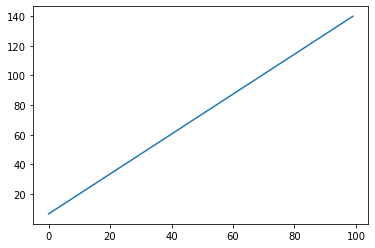

In [45]:
# Lets now plot a line
#1 ways of approaching this problem
# use numpy arange to define the boundaires of the line
# use X train values
#The Y values for the line are computed by
# A+ x*b
line = 0
x = np.array([])
### BEGIN SOLUTION
x = np.arange(0,100)
line = a + b*x
plt.plot(line)
### END SOLUTION

In [46]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

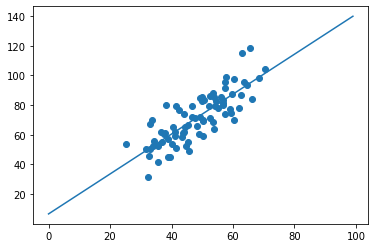

In [47]:
### BEGIN SOLUTION
#We can plot the line with the train data and see how it cuts through it
plt.plot(line)
plt.scatter(x_train,y_train)
### END SOLUTION

In [48]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0


#This kind of regression is not used to classify this is only a show case so you guys see how it works

#we classify the values depending on which part of the line they end up
#If they have a higher Y than the line for a given X we classify them as 1
#if not as 0
class_0 = []
class_1 = []

### BEGIN SOLUTION
for i in range(x_test.shape[0]):
    
    #We check the line value vs the real Y value
    if y_test.values[i] < (a + x_test.values[i]*b):
        class_0.append( (x_test.values[i],y_test.values[i]) )
    else:
        class_1.append(( x_test.values[i],y_test.values[i]) )

### END SOLUTION
        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [49]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

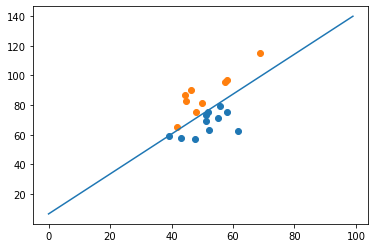

In [50]:
#we can plot the line with each class so we can clearly see the split

### BEGIN SOLUTION
plt.scatter(class_0[:,0],class_0[:,1])
plt.scatter(class_1[:,0],class_1[:,1])
plt.plot(line)
### END SOLUTION

In [51]:
#Get the total error:
#Understanding how regression lines can be used to compute the error
#or in other words a 'loss function' can help clear all the concept
#when in the future you use this functions in ML and DNNs
#we can compute a simple error by simply substracting the real value vs the line value
#we store the absolute value so positives and negatives dont cancel out
err = 0 
### BEGIN SOLUTION
for i in range(x_test.shape[0]):
    
    err += abs(y_test.values[i] - (a + x_test.values[i]*b))

### END SOLUTION
print(err)

201.8244786064339
